## Correlation of COVID-19 cases in the states of Mexico by read-write and not read-write people

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%reload_ext autoreload
%autoreload 2

#### Import COVID-19 cases data

In [20]:
dfcvcases = pd.read_csv('../Data/week1analyzes.csv')
dfcvcases

,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days
0,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964
1,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503
2,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704
3,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424
4,CHIAPAS,5730367,12063,210.510077,1129,19.702054,1655,28.881222,43,0.750388
5,CHIHUAHUA,3801487,57486,1512.197727,4742,124.740661,7493,197.107079,420,11.048308
6,COAHUILA,3218720,69397,2156.043396,1391,43.215937,6376,198.091167,70,2.174778
7,COLIMA,785153,12208,1554.856187,1043,132.840351,1210,154.110091,34,4.330366
8,DISTRITO FEDERAL,9018645,673666,7469.703043,33694,373.603795,34461,382.108399,675,7.484495
9,DURANGO,1868996,34588,1850.619263,1238,66.238772,2495,133.494133,72,3.852336


#### Import read-write data

In [3]:
dfrw = pd.read_excel('../Data/Educacion_01.xlsx', skiprows = range(0, 3))
dfrw.head()

,Entidad federativa,Total,Sabe leer y escribir,No sabe leer y escribir,No especificado
0,Estados Unidos Mexicanos,19529018.0,17554529.0,1871713.0,102776.0
1,Aguascalientes,234498.0,216002.0,17770.0,726.0
2,Baja California,553060.0,495977.0,52605.0,4478.0
3,Baja California Sur,121220.0,107786.0,12780.0,654.0
4,Campeche,145473.0,129890.0,14959.0,624.0


In [4]:
dfrw.rename(columns={'Entidad federativa': 'state', 'Sabe leer y escribir': 'read_write', 'No sabe leer y escribir': 'not_read_write', 'No especificado': 'not_specified'}, inplace=True)

In [5]:
dfrw.head()

,state,Total,read_write,not_read_write,not_specified
0,Estados Unidos Mexicanos,19529018.0,17554529.0,1871713.0,102776.0
1,Aguascalientes,234498.0,216002.0,17770.0,726.0
2,Baja California,553060.0,495977.0,52605.0,4478.0
3,Baja California Sur,121220.0,107786.0,12780.0,654.0
4,Campeche,145473.0,129890.0,14959.0,624.0


In [6]:
dfrw.query('state != "Estados Unidos Mexicanos"', inplace=True)

In [7]:
dfrw['pct_read_write']=dfrw['read_write']/dfrw['Total']*100
dfrw['pct_not_read_write']=dfrw['not_read_write']/dfrw['Total']*100

In [8]:
dfrw['state']=dfrw['state'].str.upper()

In [9]:
dfrw

,state,Total,read_write,not_read_write,not_specified,pct_read_write,pct_not_read_write
1,AGUASCALIENTES,234498.0,216002.0,17770.0,726.0,92.112513,7.577890
2,BAJA CALIFORNIA,553060.0,495977.0,52605.0,4478.0,89.678697,9.511626
3,BAJA CALIFORNIA SUR,121220.0,107786.0,12780.0,654.0,88.917670,10.542815
4,CAMPECHE,145473.0,129890.0,14959.0,624.0,89.288047,10.283008
5,COAHUILA DE ZARAGOZA,486221.0,445183.0,39038.0,2000.0,91.559805,8.028859
6,COLIMA,109080.0,97826.0,10818.0,436.0,89.682802,9.917492
7,CHIAPAS,1072615.0,866691.0,202707.0,3217.0,80.801686,18.898393
8,CHIHUAHUA,586667.0,528252.0,55258.0,3157.0,90.042903,9.418972
9,CIUDAD DE MÉXICO,1060680.0,984731.0,69130.0,6819.0,92.839593,6.517517
10,DURANGO,310170.0,279776.0,29229.0,1165.0,90.200858,9.423542


In [10]:
dfrw = dfrw.iloc[0:32,:].copy()
dfrw.sort_values(by=['state'], ascending = True, inplace=True)
dfrw.at[9,'state']='DISTRITO FEDERAL'
dfrw.at[5,'state']='COAHUILA'
dfrw.at[15,'state']='MEXICO'
dfrw.at[16,'state']='MICHOACAN'
dfrw.at[30,'state']='VERACRUZ'
dfrw.at[22,'state']='QUERETARO'
dfrw.at[24,'state']='SAN LUIS POTOSI'
dfrw.at[31,'state']='YUCATAN'
dfrw.at[19,'state']='NUEVO LEON'
dfrw.sort_values(by=['state'], ascending = True, inplace=True)

In [11]:
dfrw

,state,Total,read_write,not_read_write,not_specified,pct_read_write,pct_not_read_write
1,AGUASCALIENTES,234498.0,216002.0,17770.0,726.0,92.112513,7.577890
2,BAJA CALIFORNIA,553060.0,495977.0,52605.0,4478.0,89.678697,9.511626
3,BAJA CALIFORNIA SUR,121220.0,107786.0,12780.0,654.0,88.917670,10.542815
4,CAMPECHE,145473.0,129890.0,14959.0,624.0,89.288047,10.283008
7,CHIAPAS,1072615.0,866691.0,202707.0,3217.0,80.801686,18.898393
8,CHIHUAHUA,586667.0,528252.0,55258.0,3157.0,90.042903,9.418972
5,COAHUILA,486221.0,445183.0,39038.0,2000.0,91.559805,8.028859
6,COLIMA,109080.0,97826.0,10818.0,436.0,89.682802,9.917492
9,DISTRITO FEDERAL,1060680.0,984731.0,69130.0,6819.0,92.839593,6.517517
10,DURANGO,310170.0,279776.0,29229.0,1165.0,90.200858,9.423542


#### Merge Dataframes (COVID Cases / Read-Write Population)

In [12]:
dfAll = pd.merge(dfcvcases, dfrw,  on='state')
dfAll.head()

,state,population,total_cases,cases_rates,total_cases_last_60_days,cases_rate_last_60_days,total_deaths,deaths_rates,total_deaths_last_60_days,deaths_rate_last_60_days,Total,read_write,not_read_write,not_specified,pct_read_write,pct_not_read_write
0,AGUASCALIENTES,1434635,26695,1860.752038,828,57.715029,2456,171.193370,88,6.133964,234498.0,216002.0,17770.0,726.0,92.112513,7.577890
1,BAJA CALIFORNIA,3634868,50286,1383.434006,2403,66.109691,8648,237.917856,177,4.869503,553060.0,495977.0,52605.0,4478.0,89.678697,9.511626
2,BAJA CALIFORNIA SUR,804708,36317,4513.065609,6423,798.177724,1486,184.663257,118,14.663704,121220.0,107786.0,12780.0,654.0,88.917670,10.542815
3,CAMPECHE,1000617,11099,1109.215614,1666,166.497271,1266,126.521936,58,5.796424,145473.0,129890.0,14959.0,624.0,89.288047,10.283008
4,CHIAPAS,5730367,12063,210.510077,1129,19.702054,1655,28.881222,43,0.750388,1072615.0,866691.0,202707.0,3217.0,80.801686,18.898393


#### % Read-Write people vs Cases Rate - Regression Plot 

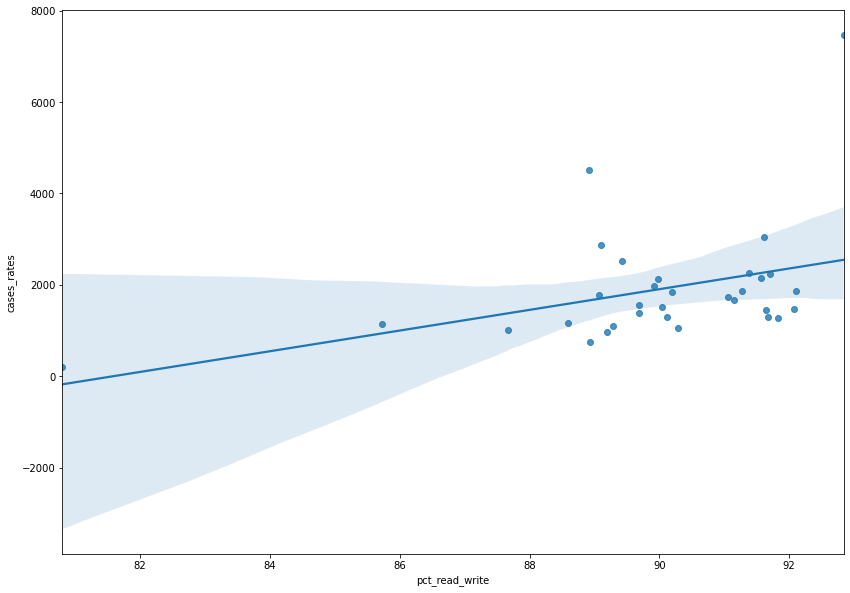

In [13]:
plt.figure(figsize=(14,10))
sns.regplot(x="pct_read_write", y="cases_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

#### % Read-Write people vs Deaths Rate - Regression Plot 

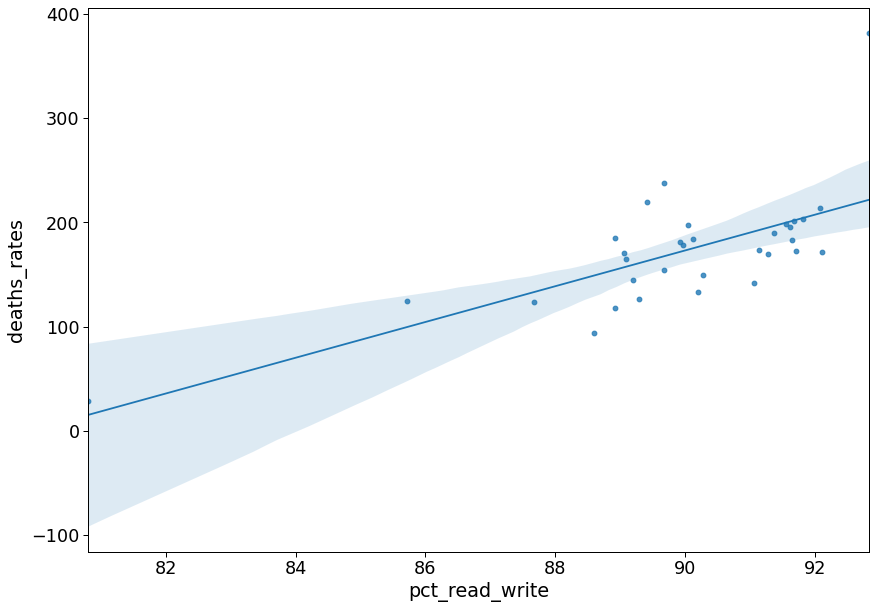

In [14]:
plt.figure(figsize=(14,10))
sns.regplot(x="pct_read_write", y="deaths_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

#### % Not Read-Write people vs Cases Rate - Regression Plot 

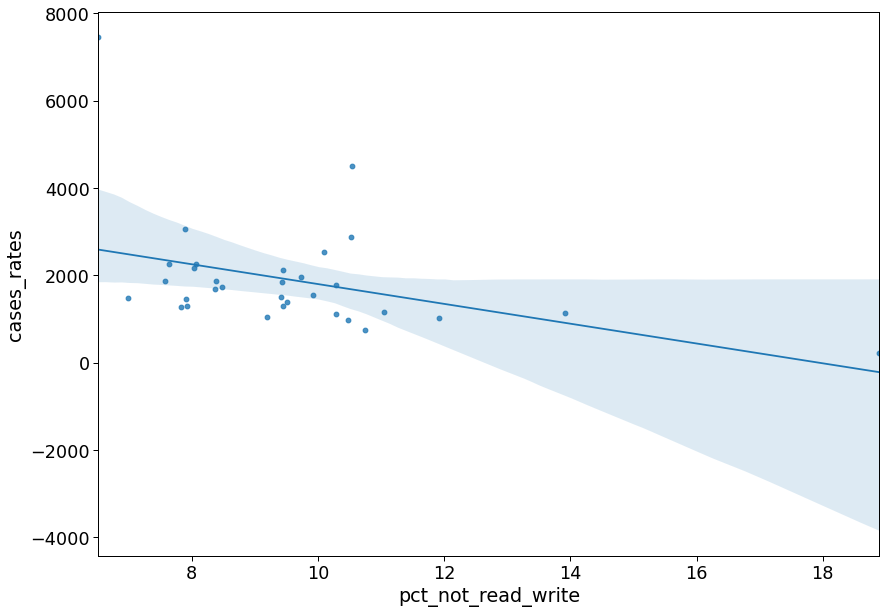

In [15]:
plt.figure(figsize=(14,10))
sns.regplot(x="pct_not_read_write", y="cases_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

#### % Not Read-Write people vs Deaths Rate - Regression Plot 

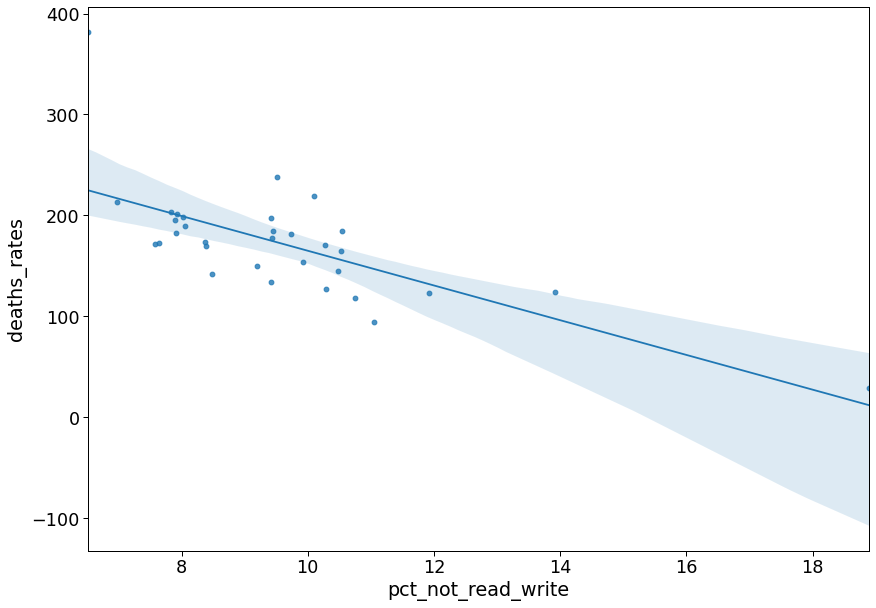

In [16]:
plt.figure(figsize=(14,10))
sns.regplot(x="pct_not_read_write", y="deaths_rates", data=dfAll) 
sns.set_context('paper', font_scale=2)

In [17]:
dfAll["pct_read_write"].describe()

count    32.000000
mean     89.953656
std       2.241227
min      80.801686
25%      89.168267
50%      90.080843
75%      91.573252
max      92.839593
Name: pct_read_write, dtype: float64

#### % Read-Write, % Not Read-Write, Cases Rate, Deaths Rate - Pairs Plot 

<Figure size 720x504 with 0 Axes>

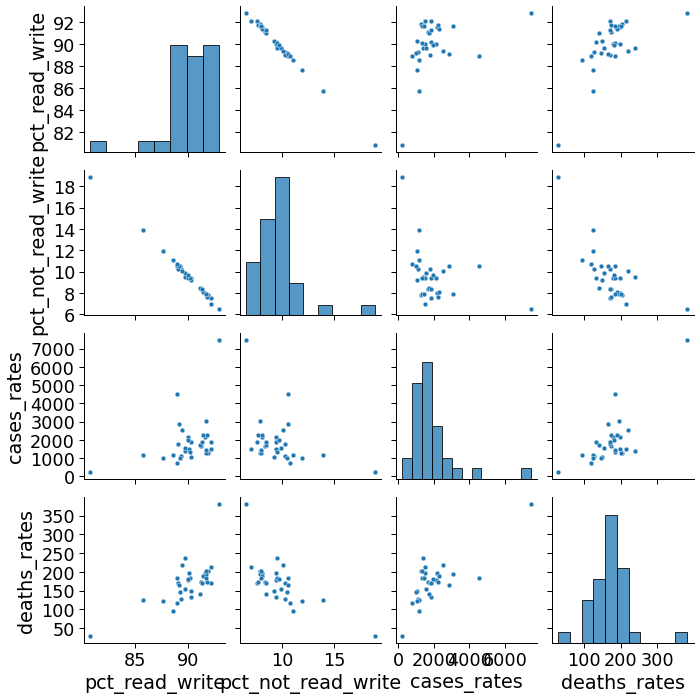

In [18]:
dfpairc=dfAll[["pct_read_write", "pct_not_read_write", "cases_rates", "deaths_rates"]]
plt.figure(figsize=(10,7))
sns.pairplot(dfpairc)
sns.set_context('paper', font_scale=1)

#### Descriptive statistics (Read-Write, % Not Read-Write, Cases Rate, Deaths Rate)

In [19]:
dfAll[['pct_read_write', 'pct_not_read_write', 'cases_rates', 'deaths_rates']].describe()

,pct_read_write,pct_not_read_write,cases_rates,deaths_rates
count,32.000000,32.000000,32.000000,32.000000
mean,89.953656,9.575914,1894.328989,172.197671
std,2.241227,2.293174,1286.625733,56.002639
min,80.801686,6.517517,210.510077,28.881222
25%,89.168267,8.004238,1246.303881,144.123363
50%,90.080843,9.431692,1614.439568,173.216172
75%,91.573252,10.332385,2136.437061,195.747458
max,92.839593,18.898393,7469.703043,382.108399
